# Plot the collected data

This notebook gathers together the output of the `Particle_analysis.ipynb` notebook and plots the combined data.

Written by Ondrej Dyck

January 20, 2023

In [1]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

Get the names of the `.csv` files that have our data

In [6]:
out_folder = 'Output'
pattern = 'SuperScan (HAADF) *.csv'
name_template = os.path.join(out_folder, pattern)
all_sheets = glob.glob(name_template)
all_sheets

['Output/SuperScan (HAADF) 48.csv',
 'Output/SuperScan (HAADF) 45.csv',
 'Output/SuperScan (HAADF) 49.csv',
 'Output/SuperScan (HAADF) 38.csv',
 'Output/SuperScan (HAADF) 41.csv',
 'Output/SuperScan (HAADF) 42.csv',
 'Output/SuperScan (HAADF) 47.csv',
 'Output/SuperScan (HAADF) 44.csv']

Remove image 44. There is vacuum in this image which required a different threshold than the rest. Best to omit it so the processing is exactly the same for every image.

In [7]:
sheets = [sheet for sheet in all_sheets if '44' not in sheet]

Read in the data and put it in a Pandas DataFrame

In [8]:
df = pd.concat([pd.read_csv(f) for f in sheets]) 
df

,name,area
0,SuperScan (HAADF) 48,3.5
1,SuperScan (HAADF) 48,2.0
2,SuperScan (HAADF) 48,5.0
3,SuperScan (HAADF) 48,1.0
4,SuperScan (HAADF) 48,12.0
...,...,...
3106,SuperScan (HAADF) 47,2.5
3107,SuperScan (HAADF) 47,7.0
3108,SuperScan (HAADF) 47,16.5
3109,SuperScan (HAADF) 47,4.5


Plot the histogram and save a copy to the `Output` folder

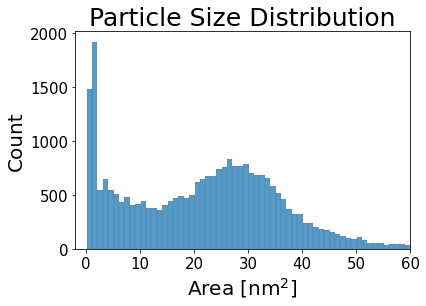

In [9]:
sns.histplot(df['area'], kde=False, binwidth=1)
plt.title('Particle Size Distribution', fontsize=25)
plt.xlabel('Area [nm$^2$]', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlim(-2,60)
plt.tick_params(labelsize=15)
savename = 'combined_data.svg'
out_name = os.path.join(out_folder, savename)
plt.savefig(out_name, bbox_inches='tight')
plt.show()